In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
data_path = '../../results/generalization/results.csv'

df = pd.read_csv(data_path)

In [11]:
rbp_names = df['Unnamed: 0'].as_matrix()
rck_mean = df['RCK_mean'].as_matrix()
deepbind_mean = df['Deepbind_mean'].as_matrix()
our_mean = df['NeuralBinder_mean'].as_matrix()
rck_std = df['RCK_std'].as_matrix()
deepbind_std = df['Deepbind_std'].as_matrix()
our_std = df['NeuralBinder_std'].as_matrix()


array([ 0.89411765,  0.54117647,  0.07843137])

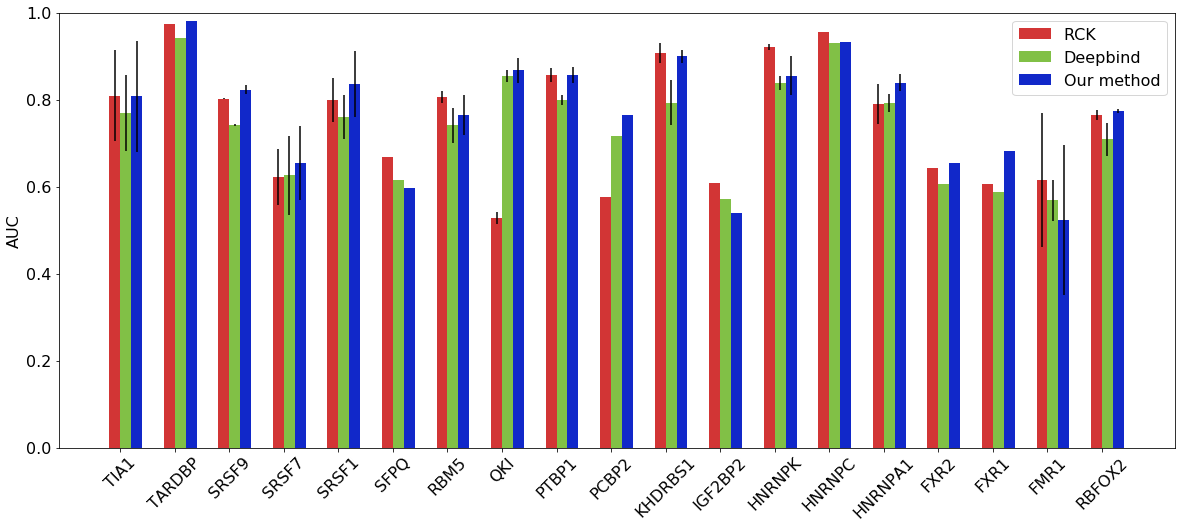

In [43]:
ind = np.arange(len(rck_mean))  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(ind, rck_mean, width, color=np.array([210., 53., 53.])/255, yerr=rck_std)
rects2 = ax.bar(ind + width, deepbind_mean, width, color=np.array([129., 192., 70.])/255, yerr=deepbind_std)
rects3 = ax.bar(ind + 2*width, our_mean, width, color=np.array([17., 40., 201.])/255, yerr=our_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('AUC', fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(rbp_names, fontsize=16)
lgd = ax.legend((rects1[0], rects2[0], rects3[0]), ('RCK', 'Deepbind', 'Our method'), fontsize=16)
plt.ylim([0, 1])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize = 16) # work on current fig
locs, labels = plt.xticks();
plt.setp(labels, rotation=45);
fig.savefig('eclip_generalization.pdf')

In [46]:

from six.moves import cPickle

sys.path.append('..')
import helper

model = 'clip_residual_net'
ss_type = 'seq'
window = 200

# dataset path
dataset_path = '/media/peter/storage/encode_eclip/eclip_datasets'

# set results path
results_path = helper.make_directory('../../results', 'encode_eclip')

# get list of .h5 files in dataset path
file_names = helper.get_file_names(dataset_path)

results_path = os.path.join(results_path, model, ss_type, 'test_scores.pickle')

with open(results_path, 'rb') as f:
    results = cPickle.load(f)
scores = results[:,0]

In [54]:
clip_mean = []
clip_std = []
for rbp_name in rbp_names:
    index = []
    for i, filename in enumerate(file_names):
        if rbp_name in filename:
            index.append(i)
    index = np.array(index)
    clip_mean.append(np.mean(scores[index]))
    clip_std.append(np.std(scores[index]))
    print(rbp_name, np.mean(scores[index]), np.std(scores[index]))
clip_mean = np.array(clip_mean)
clip_std = np.array(clip_std)
    

('TIA1', 0.89122225292438062, 0.035184673482545836)
('TARDBP', 0.97233691164327007, 0.0)
('SRSF9', 0.84343434343434343, 0.0)
('SRSF7', 0.84921580305737532, 0.063827675203494139)
('SRSF1', 0.89674752412501357, 0.0010010687455305756)
('SFPQ', 0.85055458260361938, 0.0)
('RBM5', 0.89719626168224298, 0.0)
('QKI', 0.95518020110553659, 0.010463073748264606)
('PTBP1', 0.94978656599928746, 0.0013775453011100613)
('PCBP2', 0.9586698337292161, 0.0)
('KHDRBS1', 0.91642228739002929, 0.0)
('IGF2BP2', 0.77690802348336596, 0.0)
('HNRNPK', 0.95622417529172665, 0.01207059763029561)
('HNRNPC', 0.95216862586137008, 0.0)
('HNRNPA1', 0.88745125841900041, 0.0026586316908897012)
('FXR2', 0.92864077669902911, 0.0)
('FXR1', 0.84220532319391639, 0.0)
('FMR1', 0.8958950486669488, 0.0)
('RBFOX2', 0.91997715076674869, 0.010177596201047134)


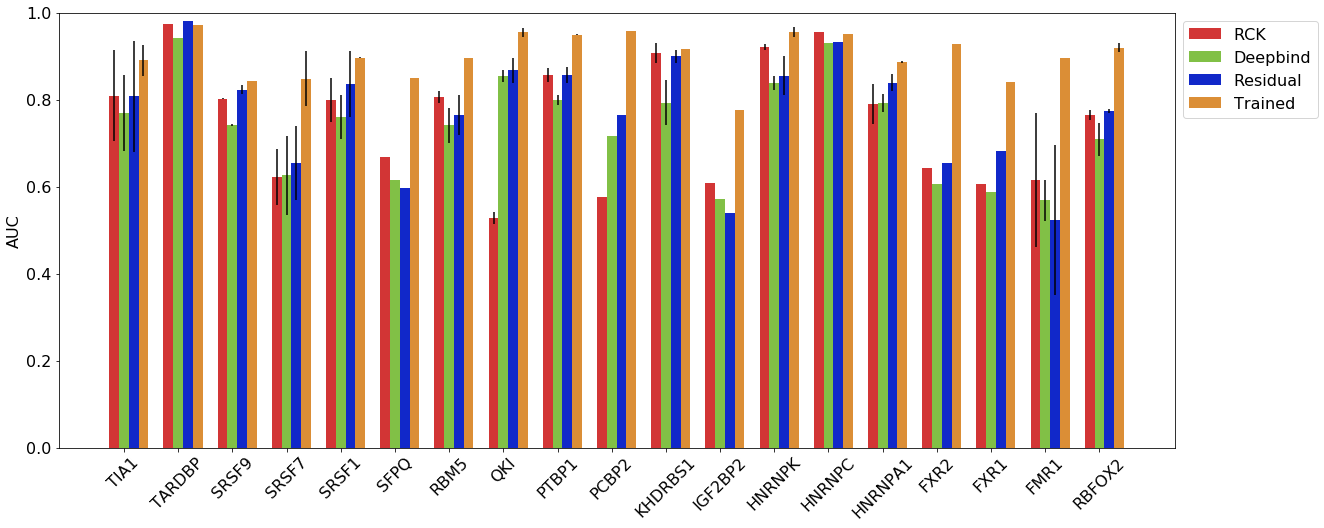

In [72]:
ind = np.arange(len(rck_mean))  # the x locations for the groups
width = 0.18       # the width of the bars

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(ind-width/2, rck_mean, width, color=np.array([210., 53., 53.])/255, yerr=rck_std)
rects2 = ax.bar(ind + width-width/2, deepbind_mean, width, color=np.array([129., 192., 70.])/255, yerr=deepbind_std)
rects3 = ax.bar(ind + 2*width-width/2, our_mean, width, color=np.array([17., 40., 201.])/255, yerr=our_std)
rects4 = ax.bar(ind + 3*width-width/2, clip_mean, width, color=np.array([219., 142., 54.])/255, yerr=clip_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('AUC', fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(rbp_names, fontsize=16)
lgd = ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('RCK', 'Deepbind', 'Residual', 'Trained'), 
                fontsize=16, bbox_to_anchor=(1, 1))
plt.ylim([0, 1])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize = 16) # work on current fig
locs, labels = plt.xticks();
plt.setp(labels, rotation=45);
#plt.axis('tight')
fig.savefig('eclip_generalization2.pdf')